<a href="https://colab.research.google.com/github/Mahmoudkhaled17/ALL-MACHINE-LEARNING-MODEL-IN-HEATbeat/blob/main/heartbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 98% 97.0M/98.8M [00:06<00:00, 19.3MB/s]
100% 98.8M/98.8M [00:06<00:00, 15.8MB/s]


In [ ]:
! unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('mitbih_train.csv',header=None)

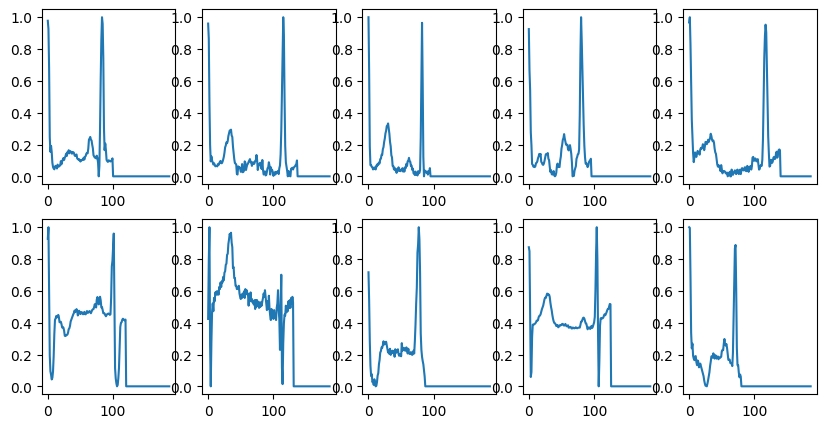

In [ ]:
fig,axis=plt.subplots(2,5,figsize=(10,5))
for i in range(10):
  ax=axis[i//5,i%5]
  ax.plot(df.iloc[i,:-1])

In [ ]:
df.iloc[:,-1].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=.9)
x_2=pca.fit_transform(x)

In [ ]:
x_2=pd.DataFrame(x_2)
x_2

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.300214,-0.003410,0.606018,0.745096,-0.226768,-0.145488,0.692298,-0.349425,0.349320,-0.341987,...,-0.058369,0.504450,-0.060749,-0.019990,0.089619,0.299252,-0.315253,0.079743,0.029670,0.195391
1,-1.436884,0.604471,-0.569402,-0.413966,-0.194302,-0.380073,0.079079,-0.016559,-0.157483,-0.499933,...,0.219057,-0.061642,0.604218,0.041492,0.363438,0.214009,-0.222517,0.060002,0.026126,-0.100160
2,-1.720580,-0.075125,-0.245855,0.075545,-0.677761,-0.350730,0.207186,-0.363509,0.383327,-0.029950,...,0.075098,0.366392,0.019420,0.037238,0.273832,0.062745,-0.409188,-0.120041,0.151677,0.078059
3,-1.509363,-0.044757,0.349790,0.618420,-0.234009,-0.616890,0.102943,-0.205053,0.893421,0.133068,...,0.412056,0.106100,0.090740,0.031625,0.196126,-0.131584,-0.157876,-0.404299,-0.038420,-0.055734
4,-1.181010,1.019874,-0.778794,-0.607392,-0.055837,-0.127393,0.542517,-0.036565,0.053350,-0.575636,...,0.356765,0.402105,0.554183,0.182310,0.271923,0.380898,-0.031526,0.018443,-0.112089,-0.007145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,-0.178812,0.231592,0.725789,-0.428690,0.288749,0.444668,-0.453253,-0.354388,0.415765,-0.435151,...,-0.345958,-0.023901,0.240546,0.128461,-0.318971,-0.065063,0.043825,-0.045348,0.014299,-0.106774
87550,2.856014,-0.398894,0.791457,-0.493046,-0.317585,-0.095192,0.038250,-1.016090,-0.746551,-0.151544,...,0.178642,0.107066,0.036405,0.241746,0.047214,0.017524,0.028157,0.145853,0.064381,0.067104
87551,2.501641,-0.218620,0.958708,-0.556387,0.696404,0.040738,0.247932,-0.427375,-0.285872,0.764835,...,-0.062570,-0.041082,-0.079205,0.155394,-0.113131,0.100447,0.015129,-0.239419,-0.160621,-0.114689
87552,-1.231281,0.885653,0.632294,-0.713086,0.427195,0.095056,-0.032239,-0.297814,0.165011,0.297248,...,0.208654,-0.016259,-0.075436,-0.077179,0.244151,0.016268,-0.049472,0.065936,-0.234195,-0.212216


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(sampling_strategy={0:72471,1: 2223, 2: 5788, 3: 5041, 4: 6431})

# Resample the dataset
x_2, y = sm.fit_resample(x_2, y)


In [ ]:
y.value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
3.0,5041
1.0,2223


<BarContainer object of 5 artists>

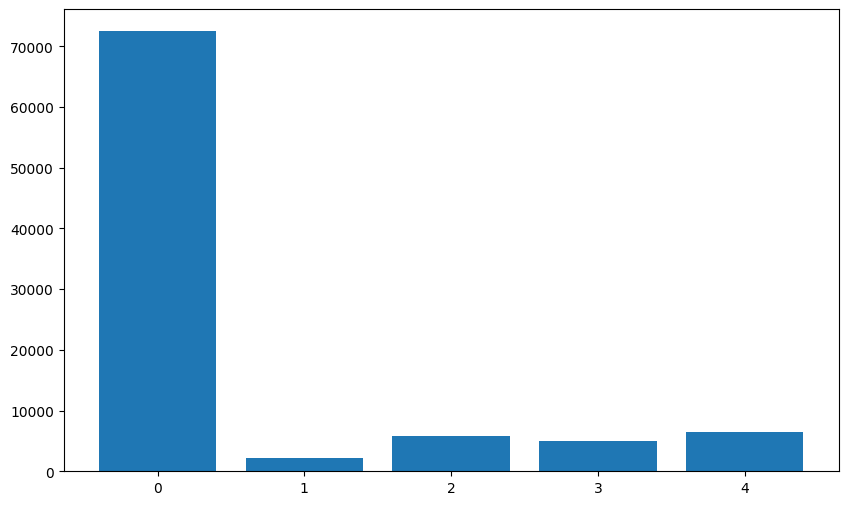

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(y.value_counts().index,y.value_counts())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
x_2=StandardScaler().fit_transform(x_2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_2,y,test_size=.2,random_state=42)


In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     14526
         1.0       0.97      0.58      0.73       449
         2.0       0.98      0.86      0.91      1104
         3.0       0.97      0.93      0.95      1015
         4.0       0.99      0.93      0.96      1297

    accuracy                           0.97     18391
   macro avg       0.98      0.86      0.91     18391
weighted avg       0.97      0.97      0.97     18391



<Axes: >

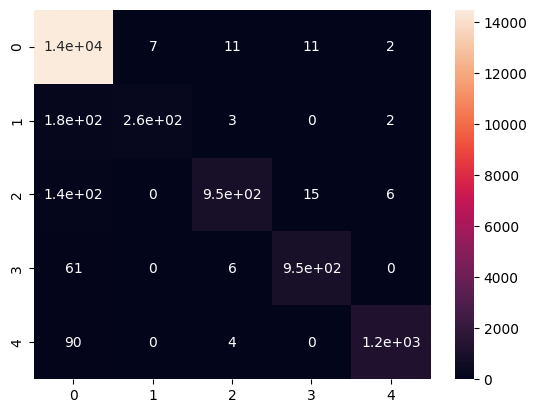

In [ ]:
print(classification_report(y_test,rf.predict(x_test)))
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test)),annot=True)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     14526
         1.0       0.97      0.57      0.72       449
         2.0       0.96      0.86      0.91      1104
         3.0       0.92      0.87      0.89      1015
         4.0       0.99      0.95      0.97      1297

    accuracy                           0.97     18391
   macro avg       0.96      0.85      0.89     18391
weighted avg       0.97      0.97      0.96     18391



<Axes: >

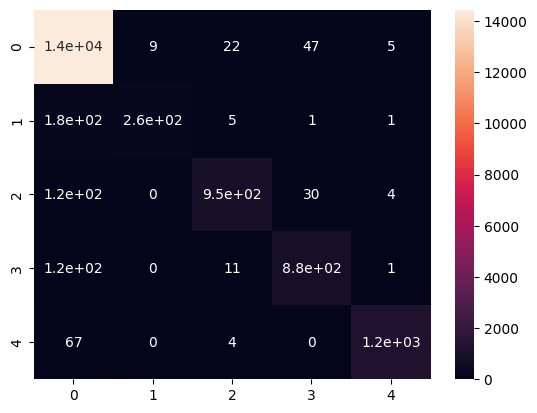

In [ ]:
print(classification_report(y_test,svc.predict(x_test)))
sns.heatmap(confusion_matrix(y_test,svc.predict(x_test)),annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     14526
         1.0       0.58      0.61      0.60       449
         2.0       0.82      0.83      0.83      1104
         3.0       0.88      0.91      0.89      1015
         4.0       0.91      0.92      0.91      1297

    accuracy                           0.94     18391
   macro avg       0.83      0.84      0.84     18391
weighted avg       0.94      0.94      0.94     18391



<Axes: >

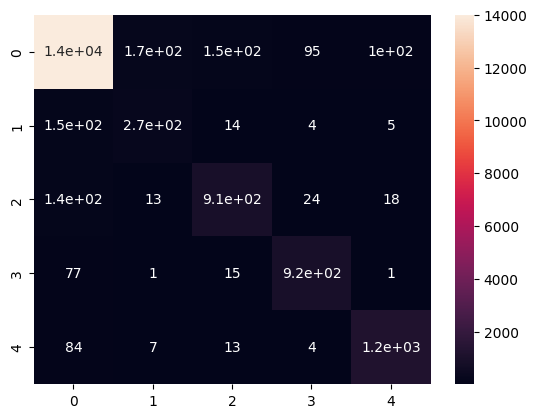

In [ ]:
print(classification_report(y_test,tree.predict(x_test)))
sns.heatmap(confusion_matrix(y_test,tree.predict(x_test)),annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14526
         1.0       0.93      0.68      0.79       449
         2.0       0.95      0.89      0.92      1104
         3.0       0.92      0.98      0.95      1015
         4.0       0.99      0.96      0.97      1297

    accuracy                           0.97     18391
   macro avg       0.95      0.90      0.92     18391
weighted avg       0.97      0.97      0.97     18391



<Axes: >

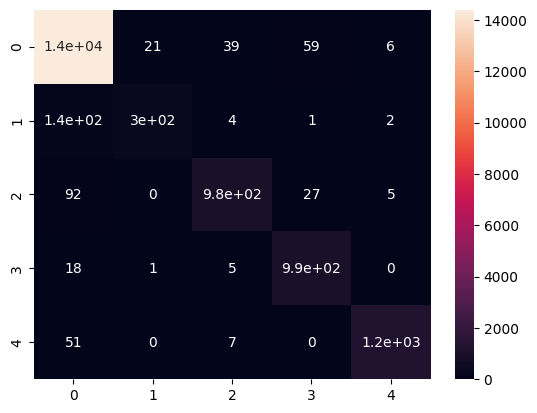

In [ ]:
print(classification_report(y_test,knn.predict(x_test)))
sns.heatmap(confusion_matrix(y_test,knn.predict(x_test)),annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     14526
         1.0       0.33      0.03      0.06       449
         2.0       0.51      0.19      0.28      1104
         3.0       0.75      0.54      0.63      1015
         4.0       0.85      0.83      0.84      1297

    accuracy                           0.87     18391
   macro avg       0.66      0.51      0.55     18391
weighted avg       0.84      0.87      0.84     18391



<Axes: >

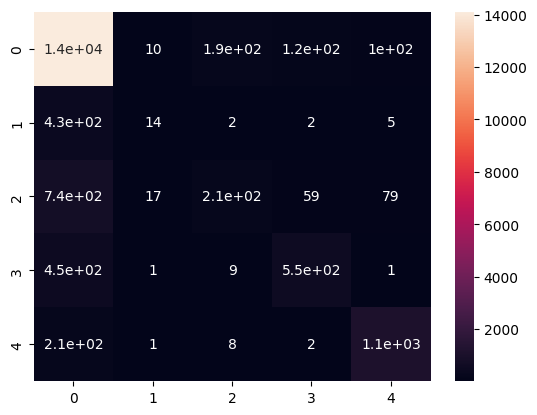

In [ ]:
print(classification_report(y_test,lr.predict(x_test)))
sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True)